# Big Cat Classification using TinyVgg

## Importing necessary Libraries

In [1]:
import torch
import os
import numpy as np

import random
from PIL import Image
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

d:\Python Projects For Github\Tiger Classifier\tiger\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.__version__

'2.0.0+cu117'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"using device: {device}")

using device: cuda


## PreProcessing Data

In [4]:
DIR_PATH = 'tiger_dataset'

In [5]:
for root, dirnames, files in os.walk(DIR_PATH):
    print(f"There are {len(dirnames)} directories and {len(files)} images in '{root}'.")

There are 3 directories and 3 images in 'tiger_dataset'.
There are 10 directories and 0 images in 'tiger_dataset\test'.
There are 0 directories and 5 images in 'tiger_dataset\test\AFRICAN LEOPARD'.
There are 0 directories and 5 images in 'tiger_dataset\test\CARACAL'.
There are 0 directories and 5 images in 'tiger_dataset\test\CHEETAH'.
There are 0 directories and 5 images in 'tiger_dataset\test\CLOUDED LEOPARD'.
There are 0 directories and 5 images in 'tiger_dataset\test\JAGUAR'.
There are 0 directories and 5 images in 'tiger_dataset\test\LIONS'.
There are 0 directories and 5 images in 'tiger_dataset\test\OCELOT'.
There are 0 directories and 5 images in 'tiger_dataset\test\PUMA'.
There are 0 directories and 5 images in 'tiger_dataset\test\SNOW LEOPARD'.
There are 0 directories and 5 images in 'tiger_dataset\test\TIGER'.
There are 10 directories and 0 images in 'tiger_dataset\train'.
There are 0 directories and 236 images in 'tiger_dataset\train\AFRICAN LEOPARD'.
There are 0 directories

In [6]:
#train directory
TRAIN_DIR = os.path.join(DIR_PATH,'train')

#test directory
TEST_DIR = os.path.join(DIR_PATH,'test')

#val directory
VAL_DIR = os.path.join(DIR_PATH,'valid')

TRAIN_DIR, TEST_DIR, VAL_DIR

('tiger_dataset\\train', 'tiger_dataset\\test', 'tiger_dataset\\valid')

In [7]:
#creating a list of all images
img_list = list()

for root, dirname, files in os.walk(DIR_PATH):
    for file in files:
        if file.endswith(".jpg"):
            img_list.append((os.path.join(root, file)))

In [8]:
img_list[:5]

['tiger_dataset\\test\\AFRICAN LEOPARD\\1.jpg',
 'tiger_dataset\\test\\AFRICAN LEOPARD\\2.jpg',
 'tiger_dataset\\test\\AFRICAN LEOPARD\\3.jpg',
 'tiger_dataset\\test\\AFRICAN LEOPARD\\4.jpg',
 'tiger_dataset\\test\\AFRICAN LEOPARD\\5.jpg']

###  Random Image with size

Height of Image| 224
Width of Image| 224
Path of Image| tiger_dataset\train\CARACAL\171.jpg
Class of Image| CARACAL


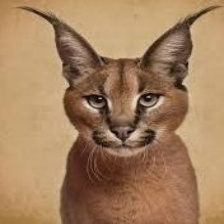

In [9]:
random.seed(42)

random_path = random.choice(img_list)

image = Image.open(random_path)
label = os.path.dirname(random_path)
label = os.path.basename(label)

print(f'Height of Image| {image.height}')
print(f'Width of Image| {image.width}')
print(f'Path of Image| {random_path}')
print(f'Class of Image| {label}')
image

In [10]:
random.seed(42)

random_list = []
random_class = []

for i in range(4):
    p = random.choice(img_list)
    random_list.append(p)
    name = os.path.dirname(p)
    name = os.path.basename(name)
    random_class.append(name)

In [11]:
random_list,random_class

(['tiger_dataset\\train\\CARACAL\\171.jpg',
  'tiger_dataset\\train\\AFRICAN LEOPARD\\053.jpg',
  'tiger_dataset\\train\\JAGUAR\\143.jpg',
  'tiger_dataset\\train\\JAGUAR\\020.jpg'],
 ['CARACAL', 'AFRICAN LEOPARD', 'JAGUAR', 'JAGUAR'])

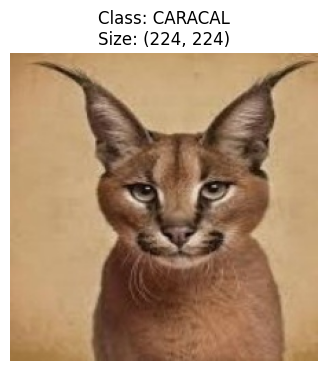

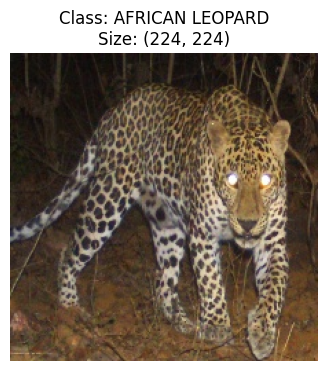

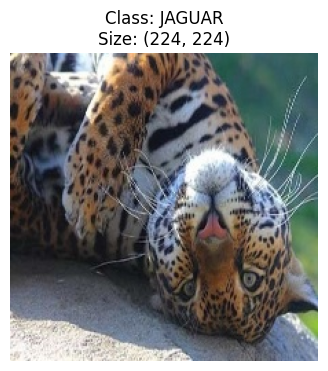

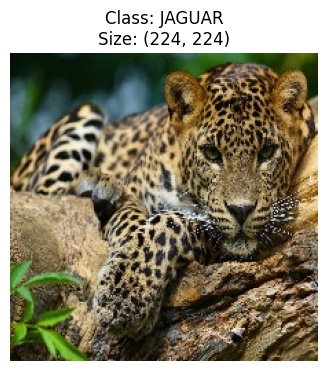

In [12]:
#Random Images and their size
for num in range(4):
    with Image.open(random_list[num]) as f:
        plt.figure(figsize = (4,4))
        plt.imshow(f) 
        plt.title(f"Class: {random_class[num]}\nSize: {f.size}")
        plt.axis("off")

In [13]:
#transform function for prepairing the images for neural network
data_transform = transforms.Compose([
    #resize the image
    transforms.Resize(size=(64, 64)),
    #Horizontal flip with .5 probability
    transforms.RandomHorizontalFlip(p=0.5),
    #convert to Tensor
    transforms.ToTensor() 
])

In [14]:
#creation of Train Data and test data
train_data = datasets.ImageFolder(root=TRAIN_DIR,
                                  transform=data_transform, 
                                  target_transform=None)

test_data = datasets.ImageFolder(root=TEST_DIR,
                                transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 2334
    Root location: tiger_dataset\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 50
    Root location: tiger_dataset\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


### Before and after transform

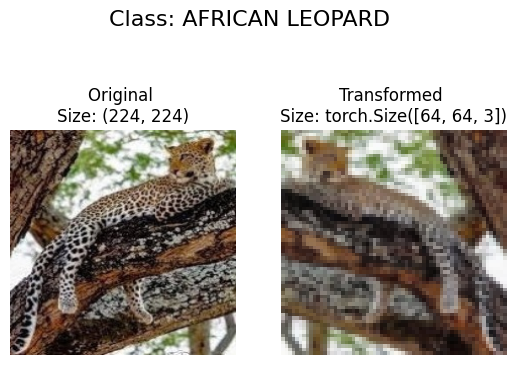

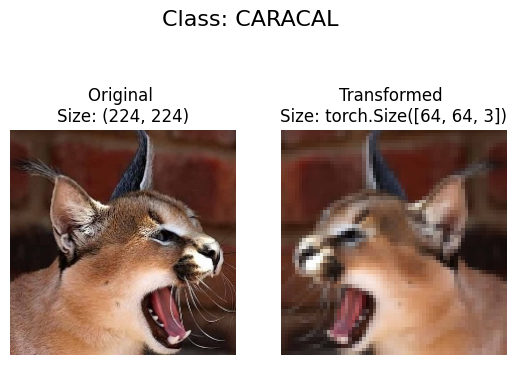

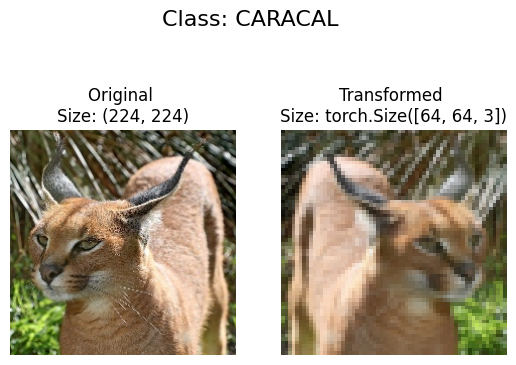

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=2):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {os.path.basename(os.path.dirname(image_path))}", fontsize=16)

plot_transformed_images(img_list, 
                        transform=data_transform, 
                        n=3)

In [16]:
#all the classes that can be determined
class_names = train_data.classes
class_names

['AFRICAN LEOPARD',
 'CARACAL',
 'CHEETAH',
 'CLOUDED LEOPARD',
 'JAGUAR',
 'LIONS',
 'OCELOT',
 'PUMA',
 'SNOW LEOPARD',
 'TIGER']

In [17]:
#Iterable dataloaders to Create Batches of data to load into the model
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=32, # how many samples per batch?
                              num_workers=os.cpu_count()-1,# how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=os.cpu_count()-1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x11df300a610>,
 <torch.utils.data.dataloader.DataLoader at 0x11df300a670>)

In [18]:
img, label = next(iter(train_dataloader))

#current image shape
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [19]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: [] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # Adjust display if n too high or else images will overlap
    if n > 7:
        n = 7
        display_shape = False
        print("For display purposes, n shouldn't be larger than 6, setting to 6 and removing shape display.")
    
    #Set random seed to create reproducibility
    if seed:
        random.seed(seed)

    #Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # Setup plot
    plt.figure(figsize=(16, 10))

    #Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        #Adjust image tensor for plotting: [color_channels, height, width(pytoch)] -> [color_channels, height, width(matplotlib)]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
        plt.title(title)

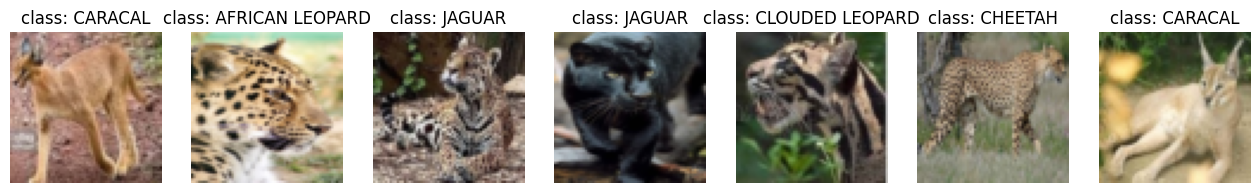

In [20]:
display_random_images(train_data, 
                      n=7, 
                      classes=class_names,
                      seed=42)

## Model Creation

In [21]:
#Import the TinyVGG model 
from TinyVGG import tinyVGG

model1 = tinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, #intermediate units
                  output_shape=len(train_data.classes)).to(device) #output shape 10 in this case

In [22]:
model1

tinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

###  Model summary

In [23]:
#How each layer accepts and outputs the image
from torchinfo import summary
summary(model1, input_size=[1, 3, 64, 64])

d:\Python Projects For Github\Tiger Classifier\tiger\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
d:\Python Projects For Github\Tiger Classifier\tiger\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Train and test loops

In [24]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward Tracking(autograd)
        loss.backward()

        # 5. Optimizer step(making changes to the weigths)
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [25]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager this remove grad
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [26]:
#Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = torch.nn.CrossEntropyLoss(),
          epochs: int = 20):
    
    #Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    #Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model1,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        #Print Results after each epoch
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        #Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

## Training of the model 

In [27]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
model_results = train(model=model1, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and duration of training
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  2%|▏         | 1/50 [00:22<18:37, 22.80s/it]

Epoch: 1 | train_loss: 2.2619 | train_acc: 0.1291 | test_loss: 2.5071 | test_acc: 0.1000


  4%|▍         | 2/50 [00:41<16:23, 20.49s/it]

Epoch: 2 | train_loss: 2.0898 | train_acc: 0.2048 | test_loss: 2.0381 | test_acc: 0.2800


  6%|▌         | 3/50 [01:02<16:11, 20.66s/it]

Epoch: 3 | train_loss: 1.8814 | train_acc: 0.3029 | test_loss: 1.8155 | test_acc: 0.3000


  8%|▊         | 4/50 [01:20<15:02, 19.62s/it]

Epoch: 4 | train_loss: 1.7899 | train_acc: 0.3371 | test_loss: 1.7573 | test_acc: 0.3000


 10%|█         | 5/50 [01:38<14:15, 19.01s/it]

Epoch: 5 | train_loss: 1.7135 | train_acc: 0.3577 | test_loss: 1.6371 | test_acc: 0.3200


 12%|█▏        | 6/50 [01:56<13:39, 18.63s/it]

Epoch: 6 | train_loss: 1.6257 | train_acc: 0.3975 | test_loss: 1.5989 | test_acc: 0.3400


 14%|█▍        | 7/50 [02:14<13:13, 18.47s/it]

Epoch: 7 | train_loss: 1.5686 | train_acc: 0.4293 | test_loss: 1.4474 | test_acc: 0.5000


 16%|█▌        | 8/50 [02:32<12:48, 18.31s/it]

Epoch: 8 | train_loss: 1.5063 | train_acc: 0.4367 | test_loss: 1.4299 | test_acc: 0.4600


 18%|█▊        | 9/50 [02:50<12:24, 18.16s/it]

Epoch: 9 | train_loss: 1.4361 | train_acc: 0.4628 | test_loss: 1.4231 | test_acc: 0.5000


 20%|██        | 10/50 [03:08<12:01, 18.04s/it]

Epoch: 10 | train_loss: 1.4043 | train_acc: 0.4716 | test_loss: 1.3940 | test_acc: 0.4400


 22%|██▏       | 11/50 [03:25<11:41, 17.99s/it]

Epoch: 11 | train_loss: 1.3348 | train_acc: 0.5166 | test_loss: 1.2889 | test_acc: 0.4000


 24%|██▍       | 12/50 [03:43<11:19, 17.89s/it]

Epoch: 12 | train_loss: 1.3013 | train_acc: 0.5163 | test_loss: 1.2645 | test_acc: 0.4600


 26%|██▌       | 13/50 [04:01<11:00, 17.86s/it]

Epoch: 13 | train_loss: 1.2579 | train_acc: 0.5380 | test_loss: 1.3450 | test_acc: 0.5200


 28%|██▊       | 14/50 [04:19<10:43, 17.87s/it]

Epoch: 14 | train_loss: 1.2620 | train_acc: 0.5425 | test_loss: 1.4407 | test_acc: 0.4600


 30%|███       | 15/50 [04:37<10:26, 17.89s/it]

Epoch: 15 | train_loss: 1.1405 | train_acc: 0.5826 | test_loss: 1.2818 | test_acc: 0.5000


 32%|███▏      | 16/50 [04:54<10:04, 17.79s/it]

Epoch: 16 | train_loss: 1.1183 | train_acc: 0.5960 | test_loss: 1.3017 | test_acc: 0.5400


 34%|███▍      | 17/50 [05:16<10:27, 19.00s/it]

Epoch: 17 | train_loss: 1.1004 | train_acc: 0.6059 | test_loss: 1.3552 | test_acc: 0.5000


 36%|███▌      | 18/50 [05:39<10:46, 20.21s/it]

Epoch: 18 | train_loss: 1.0413 | train_acc: 0.6215 | test_loss: 1.2289 | test_acc: 0.5200


 38%|███▊      | 19/50 [06:01<10:40, 20.67s/it]

Epoch: 19 | train_loss: 0.9978 | train_acc: 0.6522 | test_loss: 1.1248 | test_acc: 0.5400


 40%|████      | 20/50 [06:21<10:14, 20.48s/it]

Epoch: 20 | train_loss: 0.9563 | train_acc: 0.6546 | test_loss: 1.2104 | test_acc: 0.4800


 42%|████▏     | 21/50 [06:38<09:28, 19.61s/it]

Epoch: 21 | train_loss: 0.9235 | train_acc: 0.6701 | test_loss: 1.1669 | test_acc: 0.4800


 44%|████▍     | 22/50 [06:56<08:55, 19.13s/it]

Epoch: 22 | train_loss: 0.8617 | train_acc: 0.7028 | test_loss: 1.3083 | test_acc: 0.5200


 46%|████▌     | 23/50 [07:14<08:22, 18.62s/it]

Epoch: 23 | train_loss: 0.8548 | train_acc: 0.6989 | test_loss: 1.2577 | test_acc: 0.5800


 48%|████▊     | 24/50 [07:31<07:55, 18.27s/it]

Epoch: 24 | train_loss: 0.8852 | train_acc: 0.6937 | test_loss: 1.2831 | test_acc: 0.5400


 50%|█████     | 25/50 [07:49<07:29, 17.96s/it]

Epoch: 25 | train_loss: 0.8317 | train_acc: 0.7087 | test_loss: 1.0858 | test_acc: 0.5600


 52%|█████▏    | 26/50 [08:06<07:07, 17.83s/it]

Epoch: 26 | train_loss: 0.7997 | train_acc: 0.7180 | test_loss: 1.2348 | test_acc: 0.5200


 54%|█████▍    | 27/50 [08:23<06:45, 17.64s/it]

Epoch: 27 | train_loss: 0.7384 | train_acc: 0.7515 | test_loss: 1.2338 | test_acc: 0.6000


 56%|█████▌    | 28/50 [08:41<06:25, 17.54s/it]

Epoch: 28 | train_loss: 0.7105 | train_acc: 0.7540 | test_loss: 1.2480 | test_acc: 0.5200


 58%|█████▊    | 29/50 [08:58<06:06, 17.44s/it]

Epoch: 29 | train_loss: 0.6688 | train_acc: 0.7699 | test_loss: 1.2001 | test_acc: 0.5400


 60%|██████    | 30/50 [09:15<05:47, 17.37s/it]

Epoch: 30 | train_loss: 0.6801 | train_acc: 0.7681 | test_loss: 1.1806 | test_acc: 0.5400


 62%|██████▏   | 31/50 [09:33<05:31, 17.43s/it]

Epoch: 31 | train_loss: 0.6256 | train_acc: 0.7796 | test_loss: 1.3527 | test_acc: 0.6200


 64%|██████▍   | 32/50 [09:50<05:12, 17.38s/it]

Epoch: 32 | train_loss: 0.6024 | train_acc: 0.7900 | test_loss: 1.2382 | test_acc: 0.5400


 66%|██████▌   | 33/50 [10:07<04:54, 17.35s/it]

Epoch: 33 | train_loss: 0.5910 | train_acc: 0.7905 | test_loss: 1.2392 | test_acc: 0.5600


 68%|██████▊   | 34/50 [10:24<04:36, 17.27s/it]

Epoch: 34 | train_loss: 0.5655 | train_acc: 0.8080 | test_loss: 1.2698 | test_acc: 0.6000


 70%|███████   | 35/50 [10:41<04:18, 17.25s/it]

Epoch: 35 | train_loss: 0.5271 | train_acc: 0.8140 | test_loss: 1.2113 | test_acc: 0.5800


 72%|███████▏  | 36/50 [10:59<04:02, 17.34s/it]

Epoch: 36 | train_loss: 0.4964 | train_acc: 0.8334 | test_loss: 1.2771 | test_acc: 0.5600


 74%|███████▍  | 37/50 [11:16<03:45, 17.33s/it]

Epoch: 37 | train_loss: 0.5001 | train_acc: 0.8350 | test_loss: 1.2713 | test_acc: 0.6200


 76%|███████▌  | 38/50 [11:33<03:27, 17.27s/it]

Epoch: 38 | train_loss: 0.4928 | train_acc: 0.8279 | test_loss: 1.5573 | test_acc: 0.5200


 78%|███████▊  | 39/50 [11:51<03:10, 17.34s/it]

Epoch: 39 | train_loss: 0.4762 | train_acc: 0.8321 | test_loss: 1.4000 | test_acc: 0.5600


 80%|████████  | 40/50 [12:08<02:53, 17.31s/it]

Epoch: 40 | train_loss: 0.4252 | train_acc: 0.8607 | test_loss: 1.3713 | test_acc: 0.5600


 82%|████████▏ | 41/50 [12:25<02:35, 17.28s/it]

Epoch: 41 | train_loss: 0.3754 | train_acc: 0.8787 | test_loss: 1.3364 | test_acc: 0.6200


 84%|████████▍ | 42/50 [12:43<02:19, 17.46s/it]

Epoch: 42 | train_loss: 0.3738 | train_acc: 0.8757 | test_loss: 1.2636 | test_acc: 0.5000


 86%|████████▌ | 43/50 [13:01<02:02, 17.43s/it]

Epoch: 43 | train_loss: 0.3890 | train_acc: 0.8745 | test_loss: 1.7779 | test_acc: 0.5200


 88%|████████▊ | 44/50 [13:18<01:44, 17.36s/it]

Epoch: 44 | train_loss: 0.3306 | train_acc: 0.8874 | test_loss: 1.3596 | test_acc: 0.5800


 90%|█████████ | 45/50 [13:36<01:27, 17.48s/it]

Epoch: 45 | train_loss: 0.3040 | train_acc: 0.9015 | test_loss: 1.4814 | test_acc: 0.6000


 92%|█████████▏| 46/50 [13:53<01:09, 17.47s/it]

Epoch: 46 | train_loss: 0.2982 | train_acc: 0.8967 | test_loss: 1.2879 | test_acc: 0.5600


 94%|█████████▍| 47/50 [14:11<00:52, 17.47s/it]

Epoch: 47 | train_loss: 0.2757 | train_acc: 0.9147 | test_loss: 1.4301 | test_acc: 0.6200


 96%|█████████▌| 48/50 [14:28<00:34, 17.42s/it]

Epoch: 48 | train_loss: 0.2635 | train_acc: 0.9174 | test_loss: 1.7450 | test_acc: 0.6000


 98%|█████████▊| 49/50 [14:45<00:17, 17.39s/it]

Epoch: 49 | train_loss: 0.2414 | train_acc: 0.9233 | test_loss: 1.4867 | test_acc: 0.5600


100%|██████████| 50/50 [15:02<00:00, 18.06s/it]

Epoch: 50 | train_loss: 0.2347 | train_acc: 0.9202 | test_loss: 1.7777 | test_acc: 0.5600
Total training time: 902.824 seconds


In [28]:
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

## Loss and accuracy

In [29]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

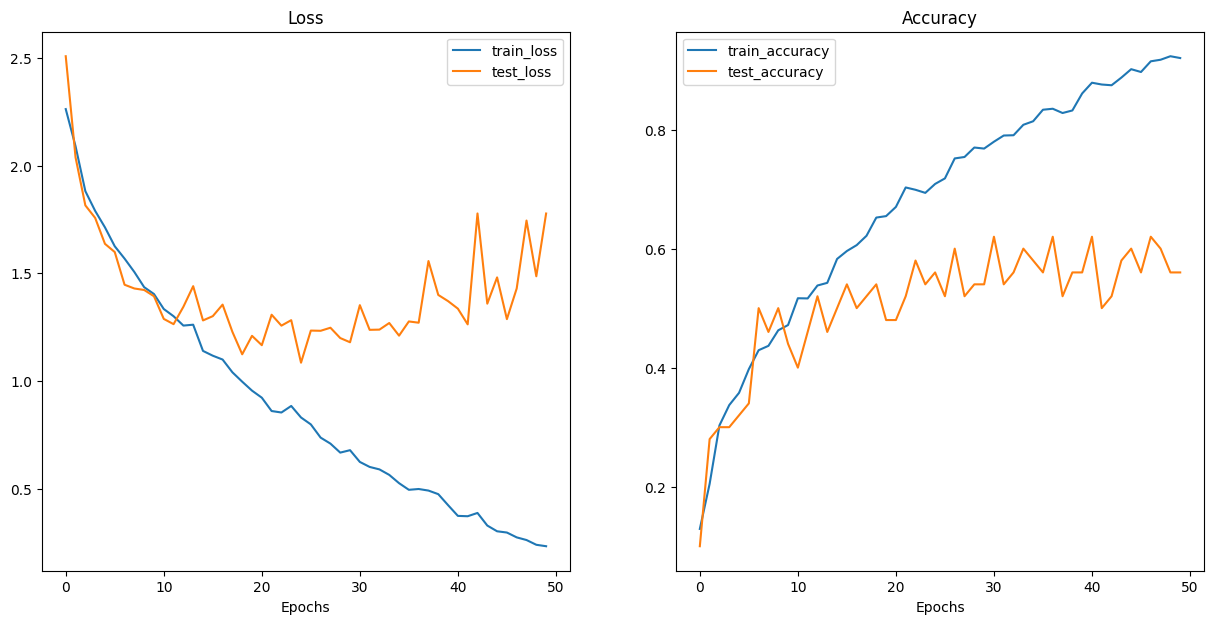

In [30]:
plot_loss_curves(model_results)

In [31]:
val_img_list = list()

for root, dirname, files in os.walk(VAL_DIR):
    for file in files:
        if file.endswith(".jpg"):
            val_img_list.append((os.path.join(root, file)))

In [32]:
val_img_list[:5]

['tiger_dataset\\valid\\AFRICAN LEOPARD\\1.jpg',
 'tiger_dataset\\valid\\AFRICAN LEOPARD\\2.jpg',
 'tiger_dataset\\valid\\AFRICAN LEOPARD\\3.jpg',
 'tiger_dataset\\valid\\AFRICAN LEOPARD\\4.jpg',
 'tiger_dataset\\valid\\AFRICAN LEOPARD\\5.jpg']

In [33]:
def predict_img_list(seed=42,
                k=5):
    random.seed(seed)
    
    val_random_path = random.choice(val_img_list)
        
    return val_random_path

In [34]:
val_random_path = predict_img_list(seed=42,
                              k=5)
val_random_path

'tiger_dataset\\valid\\SNOW LEOPARD\\1.jpg'

## Prediction on random Image

In [35]:
import torchvision

#read the image and convert that to tensor
custom_image = Image.open(val_random_path)
custom_image_resize = custom_image.resize((64,64),resample=0)
trans = transforms.functional.pil_to_tensor(custom_image_resize).type(torch.float)
 
    
model1.eval()
with torch.inference_mode():
    val_image_pred = model1(trans.unsqueeze(dim=0).to(device))

In [36]:
val_image_pred

tensor([[  1478.5129,  -5765.3477,   -624.0746,  -1857.8759,   1618.3375,
         -10225.6865,  -1440.6313,  -9778.3652,  -2965.2256,    -16.8495]],
       device='cuda:0')

In [37]:
val_image_pred_probs = torch.softmax(val_image_pred,dim=1)
    
    
print(f"Prediction probabilities: {val_image_pred_probs}")

Prediction probabilities: tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], device='cuda:0')


In [38]:
# Convert prediction probabilities -> prediction labels
val_image_pred_label= torch.argmax(val_image_pred_probs, dim=1)
    
    
print(f"Prediction label: {val_image_pred_label}")

Prediction label: tensor([4], device='cuda:0')


In [39]:
val_image_pred_class=class_names[val_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
val_image_pred_class

'JAGUAR'

In [42]:
def pred_and_plot_image(model, 
                        image_path, 
                        class_names,
                        device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image
    target_image = Image.open(image_path)
    
    # 2. Resizing the image
    custom_image_resize = custom_image.resize((64,64),resample=0)
    
    # 3. Convert the image to tensor
    trans = transforms.functional.pil_to_tensor(custom_image_resize).type(torch.float)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = trans.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    img = np.asarray(Image.open(image_path))
    plt.imshow(img)
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


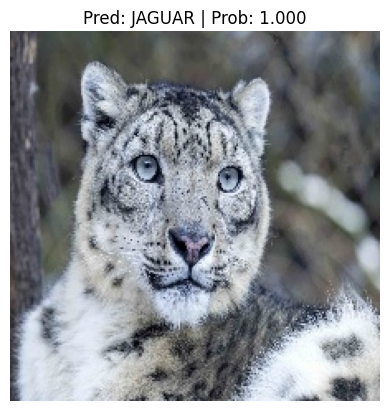

In [43]:
pred_and_plot_image(model=model1,
                    image_path=val_random_path,
                    class_names=class_names,
                    device=device)

## Validation Accuracy

In [44]:
valid_data = datasets.ImageFolder(root=VAL_DIR,
                                transform=data_transform)

valid_dataloader = DataLoader(dataset=valid_data, 
                             batch_size=5, 
                             num_workers=1, 
                             shuffle=False)

In [45]:
def evaluate(model, dataloader):
    model1.eval()
    with torch.inference_mode():
        total, correct = 0, 0
        for data in dataloader:
            # Get the inputs and move them to the device
            img, label = next(iter(dataloader))
            img, label = img.to(device), label.to(device)

            # Forward pass
            outputs = model(img)
            predicted = torch.softmax(outputs,dim=1)
            predicted = torch.argmax(outputs, dim=1)

            # Record the accuracy
            total += label.size(0)
            correct += (predicted == label).sum().item()

    # Print the accuracy
    print(f'Accuracy of the model on the {total} images: {100*correct/total} %')

In [46]:
print('Valid Case')
# Evaluate valid data

evaluate(model1, valid_dataloader)

Valid Case
Accuracy of the model on the 50 images: 60.0 %


## Saving the model

In [47]:
torch.save(model1.state_dict(),'Best_model/tinyvgg/TinyVGGmodel.pth')